## Predicting salaries using Logistic Regression

#### Load in the the data of scraped salaries

In [13]:
## YOUR CODE HERE
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [14]:
data = pd.read_csv('../assets/indeed-scraped-job-postings.csv')
data

,city,company,salary,summary,title,parsed_salary
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,Financial Data Scientist,75000.0
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,SENIOR RESEARCH ANALYST,68983.5
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,Animal Care I,27000.0
5,Denver,Denver Health,"$93,645 a year",Functions largely independently but reports to...,Assistant Research Scientist - RADARS,93645.0
6,Denver,Denver Health,"$66,654 a year","Assist research director, assistant research d...",Statistical Research Specialist,66654.0
7,Denver,Denver Health,"$66,654 a year","Assist research director, assistant research d...",Statistical Research Scientist - RADARS,66654.0
8,Denver,University of Colorado,"$65,000 - $90,000 a year",And effective working relationships with physi...,Regulatory & Compliance Manager,77500.0
9,Denver,"Computer Enterprises, Inc.","$130,000 a year",We are looking for a Software Engineer/Data Sc...,Software Engineer/Data Scientist,130000.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
city             413 non-null object
company          413 non-null object
salary           413 non-null object
summary          413 non-null object
title            413 non-null object
parsed_salary    406 non-null float64
dtypes: float64(1), object(5)
memory usage: 19.4+ KB


In [16]:
parsed_salary_null = pd.isnull(data['parsed_salary'])
data_science_salary_data_missing = data[parsed_salary_null == True]
Salary_data_missing_rows = data_science_salary_data_missing.index.values
Salary_data_missing_rows

array([ 41, 123, 124, 189, 310, 367, 389], dtype=int64)

In [17]:
Parsed_salary_missing_data = [(100/8)*2000,(120/8)*2000,
                              (120/8)*2000,(775/8)*2000,
                              (150/8)*2000,(82.5/8)*2000,(135/8)*2000]
Missing_salary = zip(Salary_data_missing_rows, Parsed_salary_missing_data)
for i,j in Missing_salary:
    data.at[i,'parsed_salary'] = j
data.head()

,city,company,salary,summary,title,parsed_salary
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,Financial Data Scientist,75000.0
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,SENIOR RESEARCH ANALYST,68983.5
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,Animal Care I,27000.0


In [18]:
parsed_salary_mean = data.parsed_salary.mean()
parsed_salary_mean

106819.07869249395

In [107]:
parsed_salary_median = data.parsed_salary.median()
parsed_salary_median

100000.0

In [108]:
data.describe()

,parsed_salary
count,413.000000
mean,106819.078692
std,49610.232837
min,10000.000000
25%,67632.000000
50%,100000.000000
75%,141158.000000
max,300000.000000


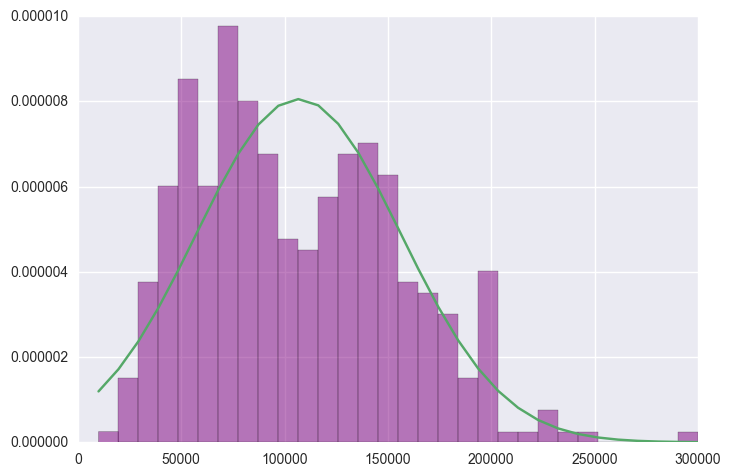

In [109]:
column_parsed_salary = data.parsed_salary
column_parsed_salary_mean = column_parsed_salary.mean()
column_parsed_salary_std = np.std(column_parsed_salary)
bin_num = 30


n, bins, patches = plt.hist(column_parsed_salary, 
                            bin_num, normed=1, facecolor='purple', alpha=0.5)
y = mlab.normpdf(bins, column_parsed_salary_mean,
                 column_parsed_salary_std)
plt.plot(bins, y)
plt.show()

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [110]:
## YOUR CODE HERE
data['salary_class'] = range(len(data))
for i, j in enumerate(data.parsed_salary):
    if j >= parsed_salary_mean:
        data['salary_class'].ix[i] = 1
    else:
        data['salary_class'].ix[i] = 0

In [111]:
data.head(5)

,city,company,salary,summary,title,parsed_salary,salary_class
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0,0
1,Denver,Department Of The Interior,"$71,012 - $99,243 a year",Investigate potential uses of geospatial data ...,Interdisciplinary Cartographer/Geographer - GS...,85127.5,0
2,Denver,Mental Health Center of Denver,"$70,000 - $80,000 a year",Advise the Data Developer with regard to creat...,Financial Data Scientist,75000.0,0
3,Denver,Denver Public Schools,"$62,712 - $75,255 a year",Portal managers on student outcome data report...,SENIOR RESEARCH ANALYST,68983.5,0
4,Denver,University of Colorado,"$25,000 - $29,000 a year",Experience entering and manipulating data in a...,Animal Care I,27000.0,0


#### Thought experiment: What is the baseline accuracy for this model?

In [112]:
## YOUR CODE HERE
baseline_accuracy = 1.0 - 1.0*data['salary_class'].mean()
baseline_accuracy

0.5351089588377724

#### Create a Logistic Regression model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. Display the coefficients and write a short summary of what they mean.

In [113]:
## YOUR CODE HERE
cities = data.city.unique()
data.city.value_counts()

New+York         103
San+Francisco     49
Boston            47
Chicago           36
Palo+Alto         27
Los+Angeles       24
Seattle           20
Atlanta           19
Denver            17
Dallas            12
Philadelphia      11
San+Diego         10
Pittsburgh         9
Houston            9
Austin             7
Phoenix            6
Miami              6
Portland           1
Name: city, dtype: int64

In [114]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [115]:
dummy_city = pd.get_dummies(data.city, prefix = 'city')
data = data.join(dummy_city)

In [116]:
feature_columns = data.columns[7:]
feature_columns

Index([u'city_Atlanta', u'city_Austin', u'city_Boston', u'city_Chicago',
       u'city_Dallas', u'city_Denver', u'city_Houston', u'city_Los+Angeles',
       u'city_Miami', u'city_New+York', u'city_Palo+Alto',
       u'city_Philadelphia', u'city_Phoenix', u'city_Pittsburgh',
       u'city_Portland', u'city_San+Diego', u'city_San+Francisco',
       u'city_Seattle'],
      dtype='object')

In [117]:
city_columns = data.columns.values.tolist()
city_columns = city_columns[7:]
city_dummy_only = data[feature_columns]
X = data[feature_columns]
Y = np.asarray(data.salary_class)

In [118]:
logit_model = sm.Logit(Y,X)
result = logit_model.fit()
print result.summary()

         Current function value: 0.592991
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  413
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                           17
Date:                Sat, 14 Jan 2017   Pseudo R-squ.:                  0.1414
Time:                        21:08:39   Log-Likelihood:                -244.91
converged:                      False   LL-Null:                       -285.25
                                        LLR p-value:                 2.891e-10
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
city_Atlanta          -1.3218      0.563     -2.349      0.019        -2.425    -0.219
city_Austin           -0.2877      0.764 

/Users/alikhanzadi/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Logistic Regression model with these features. Do they add any value? 


In [ ]:
## YOUR CODE HERE

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [ ]:
## YOUR CODE HERE

#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy, AUC, precision and recall of the model. 
- Discuss the differences and explain when you want a high-recall or a high-precision model in this scenario.

In [ ]:
## YOUR CODE HERE

#### Compare L1 and L2 regularization for this logistic regression model. What effect does this have on the coefficients learned?

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate the logistic regression model using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [ ]:
## YOUR CODE HERE

In [ ]:
## YOUR CODE HERE

#### Re-test L1 and L2 regularization. You can use LogisticRegressionCV to find the optimal reguarlization parameters. 
- Re-test what text features are most valuable.  
- How do L1 and L2 change the coefficients?

In [ ]:
## YOUR CODE HERE

In [19]:
data_scientist = ['statistical', 'statistician', 'machine learning', 'scientist', 'science', 'big data', 'research', 'researcher',
'deep learning', 'nlp', 'natural language processing', 'predictive ',
'hadoop', 'modeling', 'modeler', 'time series', 'postdoctoral', 'phd']


In [20]:
data_analyst = ['analyst', 'analysis', 'business intelligence',
                'analytics', 'intelligence', 'data administrator', 'sql']

In [21]:
engineer = ['developer', 'C++', 'java', 'software', 'engineer', 'python', 'devops', 
'product development', '.js', 'front end', 'applications', 'application']

In [22]:
solution_architect = ['architect', 'system', 'network', 'solution']

In [23]:
field = [data_scientist, data_analyst, engineer, solution_architect]

In [24]:
finance_ind = ['finance', 'financial', 'credit', 'risk', 'bank', 'banking', 'business',
'investment', 'hedge fund', 'income', 'equity', 'budget', 'fraud', 'credit'] 

In [25]:
life_sciences_ind = ['health', 'healthcare', 'enviromental', 'lab', 'life science', 'life sciences', 'chemist',
'medical', 'clinical', 'fitness', 'food', 'biotech', 'disease', 'pharma',
'epidemiologist', 'toxicologist', 'toxicology', 'laboratory', 'quality assureance',
'lab', 'biologics', 'behavioral', 'psychologist', 'bioinformatics', 'quality']

In [26]:
makreting_ind = ['digital', 'marketing', 'market', 'seo']

In [27]:
mid_level = ['sr.', 'sr ', 'senior', 'associate', 'specialist', 'professional',
'lead', 'principal', 'advanced', 'staff', 'chief', 'iii', ' iv ', 'mid-level']

In [28]:
top_level = ['manager', 'director', 'dir,' 'executive', 'vp', 'head']

In [29]:
entry_level = ['junior', 'jr.', 'jr ', 'assitant', 'enetry level', 'technician', 'ii']

In [30]:
# 'IT', 'RA ', ''

In [31]:
data['title_lowercase'] = data['title']
data['title_lowercase'] = data.title_lowercase.str.lower()
data['title_keywords'] = 0
data.head(1)

,city,company,salary,summary,title,parsed_salary,title_lowercase,title_keywords
0,Denver,Department Of The Interior,"$76,341 - $99,243 a year","Would you like to join the more than 10,000 sc...","Statistician, GS-1350-12 (DEU-PERM-DS)",87792.0,"statistician, gs-1350-12 (deu-perm-ds)",0


In [130]:
a= 0

In [33]:
data_scinece_fields = ['data_scientist', 'data_analyst', 'engineer', 'solution_architect']

for title in data.title_lowercase:
    kw = ''
    while kw == '':
        for i, field in enumerate(field):
            for keyword in field:
                if keyword in str(title):              
                    kw = data_scinece_fields[i]
                    #                 print field, keyword, kw
print kw                    

                
                
                #         if keyword in ddd[xsw]:
    #             kw = yuiop[xsw]
    #             xsw += 1
    #             print kw


KeyboardInterrupt: 

In [ ]:
b = 0
xsw = 0
kw = 0
yuiop = ['data_scientist', 'data_analyst', 'engineer', 'solution_architect']
fff = [['statistician', 'statistical', 'researcher'],['business intelligence', 'intelligence'], ['software'],['network','solution']]
for field in fff:
    for keyword in field:
        print keyword
        if keyword in data.title_lowercase[i]:
            kw = yuiop[xsw]
            xsw += 1
        if kw != 0:
            break
        break
    
    print b

In [100]:
kw = ''
a= 0
data_scinece_fields = ['data_scientist', 'data_analyst', 'engineer', 'solution_architect']
ddd = [['statistician, gs-1350-12 (deu-perm-ds)'],['interdisciplinary cartographer/geographer - gs-1370/0150-12...'],
      ['financial data scientist'],['senior research analyst']]
fff = [['statistician', 'statistical', 'scientist', 'researcher'],['business intelligence', 'intelligence'], ['software'],['network','solution']]
    
for title in data.title_lowercase:
    while kw == '':
        for field in field:
            for keyword in field:
                if keyword in str(title):              
                    kw = data_scinece_fields[a]
                    a += 1
                    print 4
#                 print field, keyword, kw
print kw                    

                
                
                #         if keyword in ddd[xsw]:
    #             kw = yuiop[xsw]
    #             xsw += 1
    #             print kw


4
baghali


In [100]:
i = 0
kw = ''
abc =  ''
a= 0
yuiop = ['data_scientist', 'data_analyst', 'engineer', 'solution_architect']
ddd = [['statistician, gs-1350-12 (deu-perm-ds)'],['interdisciplinary cartographer/geographer - gs-1370/0150-12...'],
      ['financial data scientist'],['senior research analyst']]
fff = [['statistician', 'statistical', 'scientist', 'researcher'],['business intelligence', 'intelligence'], ['software'],['network','solution']]
    
for title in ddd:
    while kw == '':
        for field in fff:
            for keyword in field:
                if keyword in str(title):              
                    kw = 'baghali'
                    a = 10
                    print 4
#                 print field, keyword, kw
print kw                    

                
                
                #         if keyword in ddd[xsw]:
    #             kw = yuiop[xsw]
    #             xsw += 1
    #             print kw


4
baghali


In [ ]:
a = ''
while a == '':
    print 1
    a = 'hi'
    print 2

In [ ]:
data.title_lowercase[3]

In [96]:
kw = ''
if kw=='':
    print 1
    kw = 2
    print 2

1
2


In [ ]:
'statistician' in 'statistician, gs-1350-12 (deu-perm-ds)'

In [ ]:
b

In [ ]:
y = []
h = data.title_keywords
for j in h:
    for m in j:
        y.append(m)
pd.Series(y).unique()

In [ ]:
# data.title_keywords = 0
# data.head()

In [ ]:
for i, a in enumerate(data.title_lowercase):
    b = []
    print type(b)

    for x in data_scientist:
        print a
        print x
        if x in a:
            pd.Series(b).append('data scientist')
        for y in data_analyst:
            if y in a:
                b.append('data analyst')
        for y in engineer:
            if y in a:
                b.append('engineer')
        for y in solution_architect:
            if y in a:
                b.append('solution architect')
                b = pd.Series(b).unique()
data['title_keywords'][i] = b
data

In [ ]:
data

In [ ]:
# for i, a in enumerate(data.title_lowercase):
#     b = []
#     for x in data_scientist:
#         if x in a:
#             b.append('data scientist')
#             break
#         elif y in data_analyst:
#             if y in a:
#                 b.append('data analyst')
#                 break
#             elif y in engineer:
#                 if y in a:
#                     b.append('engineer')
#                     break
#                 elif y in solution_architect:
#                         if y in a:
#                             b.append('solution architect')
# b = pd.Series(b).unique()
# data['title_keywords'][i] = b
# data

In [ ]:
pd.Series(data.title_keywords).unique()
gh.append(x) for x in data.title_keywords

In [ ]:
# data['title_keywords'] = 0
# data['title_keywords']=np.where(data['title_lowercase'] =='manager', 'manager', data['title_keywords'])
# data['title_keywords']=np.where(data['title_lowercase'] =='scientist', 'scientist', data['title_keywords'])
# # data['title_keywords']=np.where(data['title_lowercase'] =='statistical', 'statistical', data['title_keywords'])
# # data['title_keywords']=np.where(data['title_lowercase'] =='statistician', 'statistician', data['title_keywords'])
# # data['title_keywords']=np.where(data['title_lowercase'] =='machine learning', 'machine learning', data['title_keywords'])
# # data['title_keywords']=np.where(data['title_lowercase'] =='analyst', 'analyst', data['title_keywords'])
# # data['title_keywords']=np.where(data['title_lowercase'] =='manager', 'manager', data['title_keywords'])
# # data['title_keywords']=np.where(data['title_lowercase'] =='manager', 'manager', data['title_keywords'])
# # data['title_keywords']=np.where(data['title_lowercase'] =='manager', 'manager', data['title_keywords'])

In [ ]:
for i, a in enumerate(data.title_lowercase):
    b = []
    for x in data_scientist:
        if x in a:
            b.append('data scientist')
            break
        else:
            for y in data_analyst:
                if y in a:
                    b.append('data analyst')
                    break
            else:
                for y in engineer:
                    if y in a:
                        b.append('engineer')
                        break
                else:
                    for y in solution_architect:
                        if y in a:
                            b.append('solution architect')
                            b = pd.Series(b).unique()
    data['title_keywords'][i] = b
data.head()

In [ ]:
c = pd.Series(data['title_keywords'][5])
# c.unique()c
c.unique()